# Logistic Regression with multiple features 

### Importing Pandas, Numpy, Matplotlib, Seaborn libraries for creating Dataframe, doing mathematical operations efficiently, ploting graphs for better visualisation of data and results respectively.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("breast_cancer.csv")

In [2]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Pre-processing

## Deleting unnecessary colomns

In [3]:
X=df.drop(['id','Unnamed: 32'],axis=1)
X

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Replacing characters of target feature to 1s and 0s

#### There are two categories in target column M for Malignant and B for Benign. Replacing M with 1 and B with 0.

In [4]:
X=X.replace({'M':1,'B':0})
X

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Checking for Correlation

In [5]:
X.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Extracting target Variable

In [6]:
target=X[['diagnosis']]

### Only kept radius mean and concavity worst features for trainig and predicting 

In [7]:
X=X[['radius_mean','concavity_worst']]
#X=X.values
X

,radius_mean,concavity_worst
0,17.99,0.7119
1,20.57,0.2416
2,19.69,0.4504
3,11.42,0.6869
4,20.29,0.4000
...,...,...
564,21.56,0.4107
565,20.13,0.3215
566,16.60,0.3403
567,20.60,0.9387


## Splitting Data for Train and Test & inserting a colomn of 1 in feature matix

In [10]:
xtrain=X.iloc[:400,:]
xtest=X.iloc[400:,:]
ytrain=target.iloc[:400]
ytest=target.iloc[400:]

ones=np.ones((xtrain.shape[0],1))
xtrain=np.hstack((ones,xtrain))
print(xtrain.shape)

ones=np.ones((xtest.shape[0],1))
xtest=np.hstack((ones,xtest))
xtest.shape

(400, 3)


(169, 3)

In [11]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(400, 3) (169, 3) (400, 1) (169, 1)


In [12]:
theta=np.zeros((xtrain.shape[1],1))
theta.shape

(3, 1)

## Building Model

In [13]:
def model(x,y,theta,lr=0.007,itr=100000):
    cost_list=[]
    n=x.shape[0]
    
    for i in range (itr):
        l=np.dot(x,theta)
        h=1/(1+np.exp(-l))
        err=h-y
        cost=-(1/n)*np.sum((y*np.log(h))+((1-y)*np.log(1-h)))
#         print(cost)
        cost_list.append(cost)
        
        grad=(1/n)*(np.dot(x.T,err))
        theta=theta-lr*grad
        
    return theta,cost_list
        

## Calling Model

In [14]:
theta,cost=model(xtrain,ytrain,theta)

In [15]:
cost

[diagnosis    0.693147
 dtype: float64,
 diagnosis    0.692549
 dtype: float64,
 diagnosis    0.692279
 dtype: float64,
 diagnosis    0.692135
 dtype: float64,
 diagnosis    0.692039
 dtype: float64,
 diagnosis    0.69196
 dtype: float64,
 diagnosis    0.691889
 dtype: float64,
 diagnosis    0.69182
 dtype: float64,
 diagnosis    0.691752
 dtype: float64,
 diagnosis    0.691685
 dtype: float64,
 diagnosis    0.691618
 dtype: float64,
 diagnosis    0.69155
 dtype: float64,
 diagnosis    0.691483
 dtype: float64,
 diagnosis    0.691416
 dtype: float64,
 diagnosis    0.691349
 dtype: float64,
 diagnosis    0.691282
 dtype: float64,
 diagnosis    0.691215
 dtype: float64,
 diagnosis    0.691148
 dtype: float64,
 diagnosis    0.691081
 dtype: float64,
 diagnosis    0.691014
 dtype: float64,
 diagnosis    0.690947
 dtype: float64,
 diagnosis    0.69088
 dtype: float64,
 diagnosis    0.690813
 dtype: float64,
 diagnosis    0.690746
 dtype: float64,
 diagnosis    0.690679
 dtype: float64,
 dia

### Plotting the change of cost with increasing in iterations

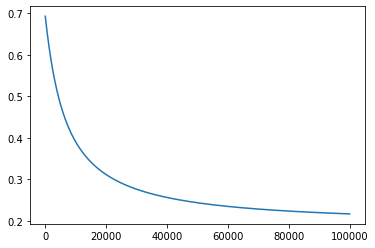

In [16]:
plt.plot(cost)
plt.show()

## Prediction

In [17]:
def predict(x,theta):
    l=np.dot(x,theta)
    ypred=1/(1+np.exp(-l))
    ans=[]
    
    for i in ypred:
        if(i>=0.5):
            ans.append(1)
        else:
            ans.append(0)
    
    #print(ypred)
    return ans

##### xtest contains test data and theta are model parameters

In [18]:
ypred=predict(xtest,theta)

# Result

#### Printing prediced value of Test Data

In [19]:
ypred

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0]

## F1 Score

In [21]:
from sklearn.metrics import f1_score
f1=f1_score(ytest,ypred,average='micro')
f1

0.9171597633136095

## Accuracy

In [22]:

# ypred=np.array(ypred, dtype='int64')
# y_= ypred > 0.5
# y_=np.array(y_, dtype='int64')
# acc=(1-np.sum(np.absolute(y_-ytest))/ytest.shape[0])
# acc

def accuracy_1(X, Y, theta):
    
    lines_1 = np.dot(X,theta)
    y_pred_1 = 1/(1+np.exp(-lines_1))
    
    y_pred_1 = y_pred_1 > 0.5
    
    y_pred_1 = np.array(y_pred_1, dtype='int64')
    acc = (1-np.sum(np.absolute(y_pred_1-Y))/Y.shape[0])*100
    
    print("Accuracy of the model is : ", round(acc,2), "%")
    return y_pred_1

In [23]:
A = accuracy_1(xtest,ytest,theta)

Accuracy of the model is :  diagnosis    91.72
dtype: float64 %


## Result Summary 

#### F1 Score : 0.9171
#### Accuracy : 91.72